In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
walmart = pd.read_csv(r'C:\Users\hp\Documents\WalmartSalesData.csv.csv')
walmart.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


C:\Users\hp\AppData\Local\Temp\ipykernel_12540\1124532041.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels(wa.index)


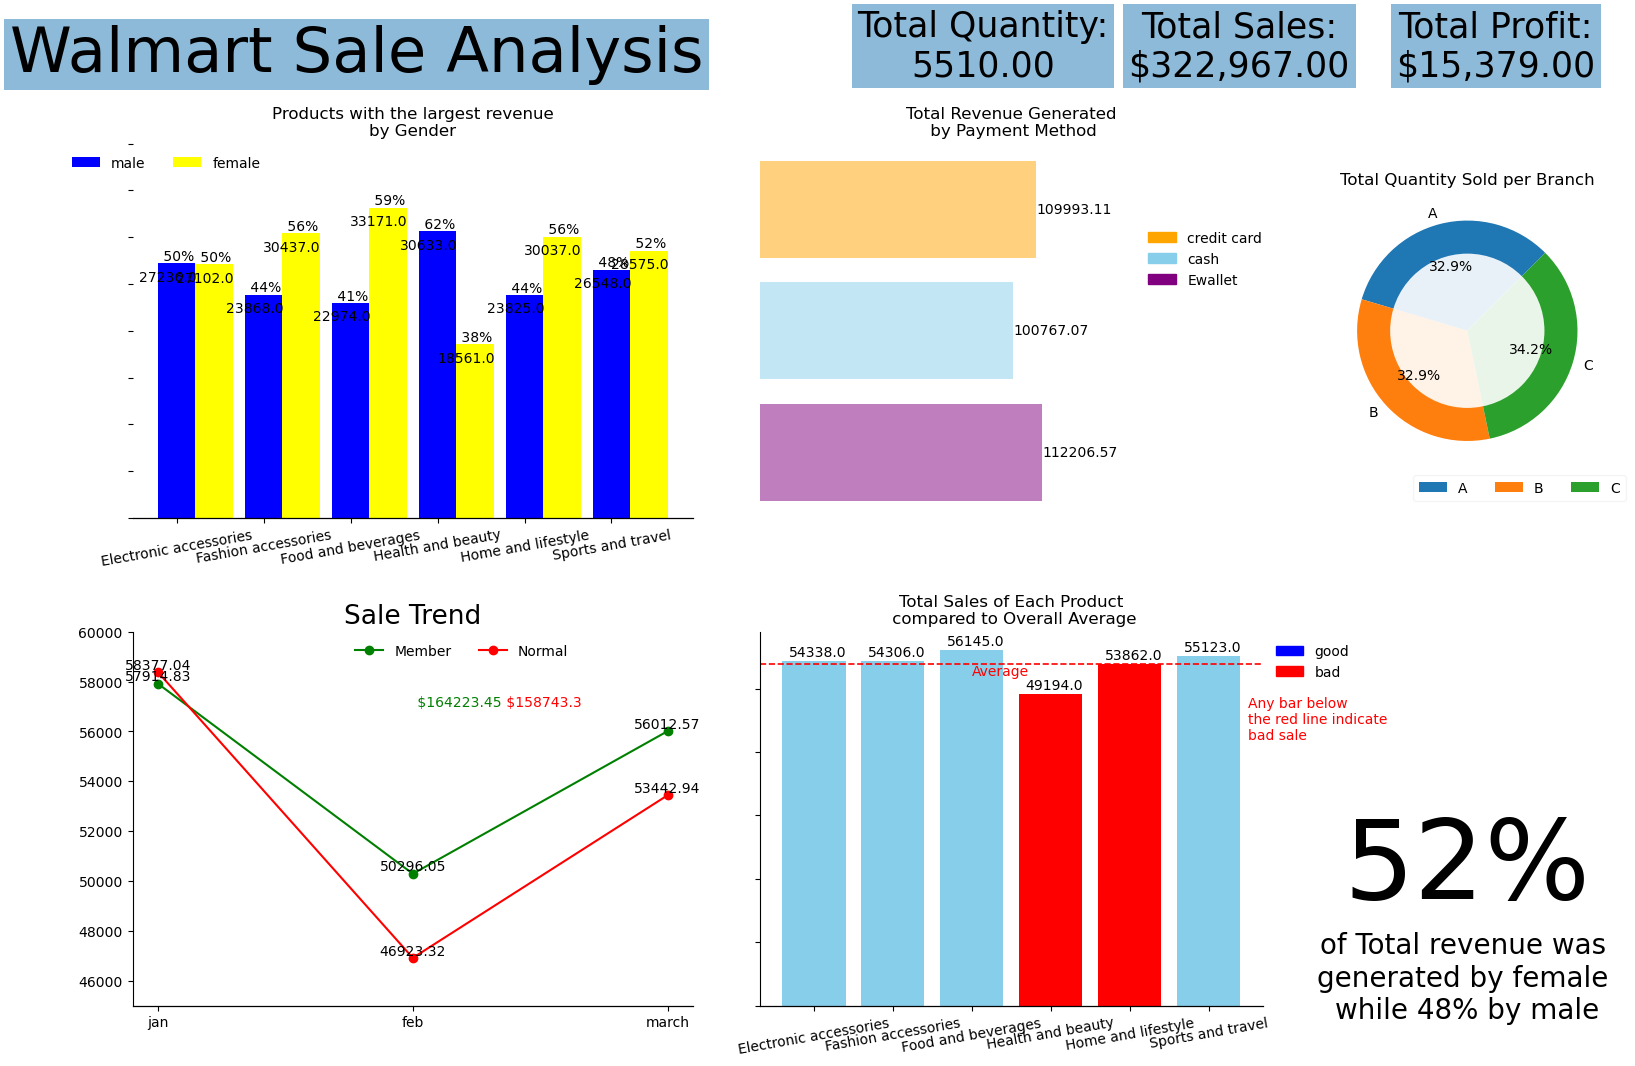

In [25]:


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(19, 15), facecolor='white')
gs = gridspec.GridSpec(ncols=26, nrows=12, figure=fig)

ax1 = fig.add_subplot(gs[0:1, 0:10])
ax2 = fig.add_subplot(gs[0:1, 14:16])
ax3 = fig.add_subplot(gs[0:1, 17:22])
ax4 = fig.add_subplot(gs[0:1, 22:26])
ax5 = fig.add_subplot(gs[6:10, 11:20])
ax6 = fig.add_subplot(gs[1:5, 0:10])
ax7 = fig.add_subplot(gs[6:10, 0:10])
ax8 = fig.add_subplot(gs[0:6, 21:26])
ax9 = fig.add_subplot(gs[1:5, 11:20])
ax10 = fig.add_subplot(gs[7:10, 21:26])

# Title
ax1.text(0.4, 0.9, 'Walmart Sale Analysis', ha='center', va='center', fontsize=45,
         bbox=dict(edgecolor='none', alpha=0.5))
for ax in [ax1, ax2, ax3, ax4, ax10, ax9]:
    ax.axis('off')

# Total Quantity, Sales, and Profit
total_quantity = 5510
total_sales = 322967
total_profit = 15379
ax2.text(0.5, 1, f'Total Quantity:\n{total_quantity:.2f}', ha='center', va='center', fontsize=25,
         bbox=dict(edgecolor='none', alpha=0.5))
ax3.text(0.5, 1, f'Total Sales:\n${total_sales:,.2f}', ha='center', va='center', fontsize=25,
         bbox=dict(edgecolor='none', alpha=0.5))
ax4.text(0.5, 1, f'Total Profit:\n${total_profit:,.2f}', ha='center', va='center', fontsize=25,
         bbox=dict(edgecolor='none', alpha=0.5))

# Gender-wise Sales
width = 0.43
x1 = np.arange(len(wa))
x2 = [x + width for x in x1]

bars1 = ax6.bar(x1, wa['Male'], width=width, label='male', color='blue')
bars2 = ax6.bar(x2, wa['Female'], width=width, label='female', color='yellow')
ax6.set_ylim(0, 40000)

def my_bar(bars):
    for bar in bars:
        height = bar.get_height().round(0)
        ax6.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width(), height),
                     xytext=(-20, -15),
                     textcoords='offset points', ha='center',
                     va='bottom')

my_bar(bars1)
my_bar(bars2)

for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    total_height = height1 + height2
    ax6.text(bar1.get_x() + bar1.get_width() / 2, height1, f'{height1 / total_height: .0%}', ha='center',
             va='bottom')
    ax6.text(bar2.get_x() + bar2.get_width() / 2, height2, f'{height2 / total_height: .0%}', ha='center',
             va='bottom')

ax6.set_title('Products with the largest revenue\nby Gender')
ax6.set_xticklabels(wa.index)
ax6.set_xticks(x1)
ax6.set_yticklabels('')
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['bottom'].set_color('black')
ax6.spines['bottom'].set_linewidth(0.9)
ax6.legend(bbox_to_anchor=(0.25, 1), ncol=2, frameon=False)
ax6.xaxis.set_tick_params(rotation=10)

# Sale Trend
ax7.plot(totalsalemonth.index,
         totalsalemonth['Member'],
         color='green',
         label='Member',
         marker='o'
         )
ax7.plot(totalsalemonth.index,
         totalsalemonth['Normal'],
         color='red',
         label='Normal',
         marker='o'
         )

ax7.set_xticks(totalsalemonth.index)  # Set xticks based on the index

for i, price in enumerate(totalsalemonth['Member']):
    ax7.text(totalsalemonth.index[i], price, f'{price:.2f}', ha='center', va='bottom')

for i, price in enumerate(totalsalemonth['Normal']):
    ax7.text(totalsalemonth.index[i], price, f'{price:.2f}', ha='center', va='bottom')
ax7.set_ylim(45000, 60000)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.legend(bbox_to_anchor=(0.8, 1), ncol=2, frameon=False)
ax7.text(1, 57000, ' $164223.45', color='green')
ax7.text(1.35, 57000, ' $158743.3', color='red')
ax7.set_title('Sale Trend', fontsize=19)
ax7.spines['bottom'].set_linewidth(0.9)
ax7.spines['bottom'].set_color('black')

# Total Revenue by Payment Method
colors = ['purple', 'skyblue', 'orange']
bars1 = ax9.barh(payment_method.index, payment_method['Total'], color=colors, alpha=0.5)
for bar in bars1:
    width = bar.get_width()
    ax9.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')
ax9.set_xlim(0, 200000)
ax9.xaxis.set_tick_params(rotation=45)
purple = mpatches.Patch(label='Ewallet', color='purple')
orange = mpatches.Patch(label='credit card', color='orange')
skyblue = mpatches.Patch(label='cash', color='skyblue')
ax9.legend(handles=[orange, skyblue, purple], bbox_to_anchor=(1.023, 0.8), ncol=1, frameon=False)
ax9.set_yticklabels('')
ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax9.spines['bottom'].set_linewidth(0.9)
ax9.spines['bottom'].set_color('black')
ax9.set_title('Total Revenue Generated\n by Payment Method')

# Total Sales of Each Product Compared to Overall Average
colors = ['skyblue', 'skyblue', 'skyblue', 'red', 'red', 'skyblue']
bars1 = ax5.bar(product.index, product['Total'], color=colors)
ax5.axhline(53828, color='red', linestyle='--', linewidth=1.2)
blue = mpatches.Patch(label='good', color='blue')
red = mpatches.Patch(label='bad', color='red')
ax5.legend(handles=[blue, red], bbox_to_anchor=(1, 1), ncol=1, frameon=False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_color('black')
ax5.spines['bottom'].set_linewidth(0.9)
ax5.spines['right'].set_visible(False)
ax5.text(5.5, 42000, 'Any bar below \nthe red line indicate\nbad sale', color='red')
ax5.text(2, 52000, 'Average', color='red')


def my_bar(bars):
    for bar in bars:
        height = bar.get_height().round(0)
        ax5.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width(), height),
                     xytext=(-20, 1),
                     textcoords='offset points', ha='center',
                     va='bottom')


ax5.set_yticklabels('')
my_bar(bars1)
ax5.xaxis.set_tick_params(rotation=10)
ax5.set_title('Total Sales of Each Product\n compared to Overall Average')

# Total Quantity Sold per Branch
ax8.pie(branch_quantity_sales['Total'],
        startangle=45,
        labels=branch_quantity_sales.index,
        autopct='%1.1f%%'
        )
donut = plt.Circle((0, 0), 0.70, fc='white', linewidth=0.5, alpha=0.9)
ax8.add_artist(donut)

legend = ax8.legend(bbox_to_anchor=(1.1, 0), ncol=3)
legend.get_frame().set_alpha(0.2)
ax8.set_title('Total Quantity Sold per Branch')

# Percentage of Total Revenue Generated by Gender
percentage = 52

ax10.text(0.5, 0.5, f'{percentage:.0f}%', ha='center', va='center', fontsize=80,
          bbox=dict(facecolor = 'white',edgecolor='none', alpha=0.5))
ax10.text(0.5, 0.1, 'of Total revenue was \ngenerated by female \nwhile 48% by male', ha='center', va='center',
          fontsize=20,
          bbox=dict(facecolor = 'white',edgecolor='none', alpha=0.5))

plt.savefig('walmart.png',dpi = 500)


In [4]:
revenue_gender = walmart.groupby(['Gender'])[['Total']].sum()
revenue_gender

,Total
Gender,
Female,167882.925
Male,155083.824


In [5]:
percentage = 52
ax.text(0.5, 0.5, f'{percentage:.1f}%', ha='center', va='center', fontsize=70, color='blue')
ax.text(0.5, 0.3, 'of Total wa genrated by female \nwhile 48% by male', ha='center', va='center', fontsize=14, color='blue')

Text(0.5, 0.3, 'of Total wa genrated by female \nwhile 48% by male')

In [6]:
walmart.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6


In [9]:
 wa = wa2.pivot_table(index = 'Product line',
               columns = 'Gender',
               values= 'Total')

In [63]:
walmart.loc[:,['Total','Quantity','gross income']].sum()

Total           322966.749
Quantity          5510.000
gross income     15379.369
dtype: float64

In [8]:
wa2 = walmart.groupby(['Gender','Product line'])[['Total']].sum()


In [10]:
branch = walmart.groupby(['Branch','City'])[['Total']].sum()
branch.head()

,,Total
Branch,City,
A,Yangon,106200.3705
B,Mandalay,106197.6720
C,Naypyitaw,110568.7065


In [11]:
walmart.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6


In [12]:
wa_line = walmart.pivot_table(index = 'Date',
                              columns ='Customer type',
                              values = 'Total',
                              aggfunc = 'sum')
wa_line.head(2)

Customer type,Member,Normal
Date,,
2019-01-01,2753.6250,1991.5560
2019-01-02,912.2505,1033.2525


In [13]:
wa_line.index = pd.to_datetime(wa_line.index) 
wa_line['month'] = wa_line.index.month


In [12]:
wa_line.head()

Customer type,Member,Normal,month
Date,,,
2019-01-01,2753.6250,1991.5560,1
2019-01-02,912.2505,1033.2525,1
2019-01-03,644.8260,1433.3025,1
2019-01-04,1477.4655,146.2230,1
2019-01-05,1554.7035,1981.9800,1


In [14]:
wa_line.index = wa_line['month']
wa_line.drop(columns ='month')

Customer type,Member,Normal
month,,
1,2753.6250,1991.5560
1,912.2505,1033.2525
1,644.8260,1433.3025
1,1477.4655,146.2230
1,1554.7035,1981.9800
...,...,...
3,1339.4640,623.0490
3,1775.1195,1127.7000
3,1199.5620,1029.8400


In [15]:
totalsalemonth =  wa_line.groupby(wa_line.index)[['Member','Normal']].sum()
totalsalemonth


Customer type,Member,Normal
month,,
1,57914.829,58377.039
2,50296.050,46923.324
3,56012.565,53442.942


In [16]:
mapping = {1: 'jan', 2:'feb', 3:'march'} 
totalsalemonth.index = totalsalemonth.index.map(mapping)

In [17]:
totalsalemonth

Customer type,Member,Normal
month,,
jan,57914.829,58377.039
feb,50296.050,46923.324
march,56012.565,53442.942


In [305]:
walmart.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [18]:
branch_quantity_sales = walmart.groupby(['Branch'])[['Total']].sum().round()
branch_quantity_sales

,Total
Branch,
A,106200.0
B,106198.0
C,110569.0


In [19]:
payment_method = walmart.groupby(['Payment'])[['Total']].sum()
payment_method

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


In [452]:
walmart.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [20]:
product = walmart.groupby(['Product line'])[['Total']].sum()
ax.axhline(53828, color = 'red' , linestyle = '-')

In [21]:
product['Total'].mean()

53827.7915